In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as mpatches

In [2]:
magnitude_pruning_df = pd.read_csv("rn50_magnitude_pruning.csv")
random_pruning_df = pd.read_csv("rn50_random_pruning.csv")
variational_dropout_df = pd.read_csv("rn50_variational_dropout.csv")
gRDA_df = pd.read_csv("rn50_gRDA.csv")

In [3]:
total_df = [gRDA_df, magnitude_pruning_df, random_pruning_df, variational_dropout_df]

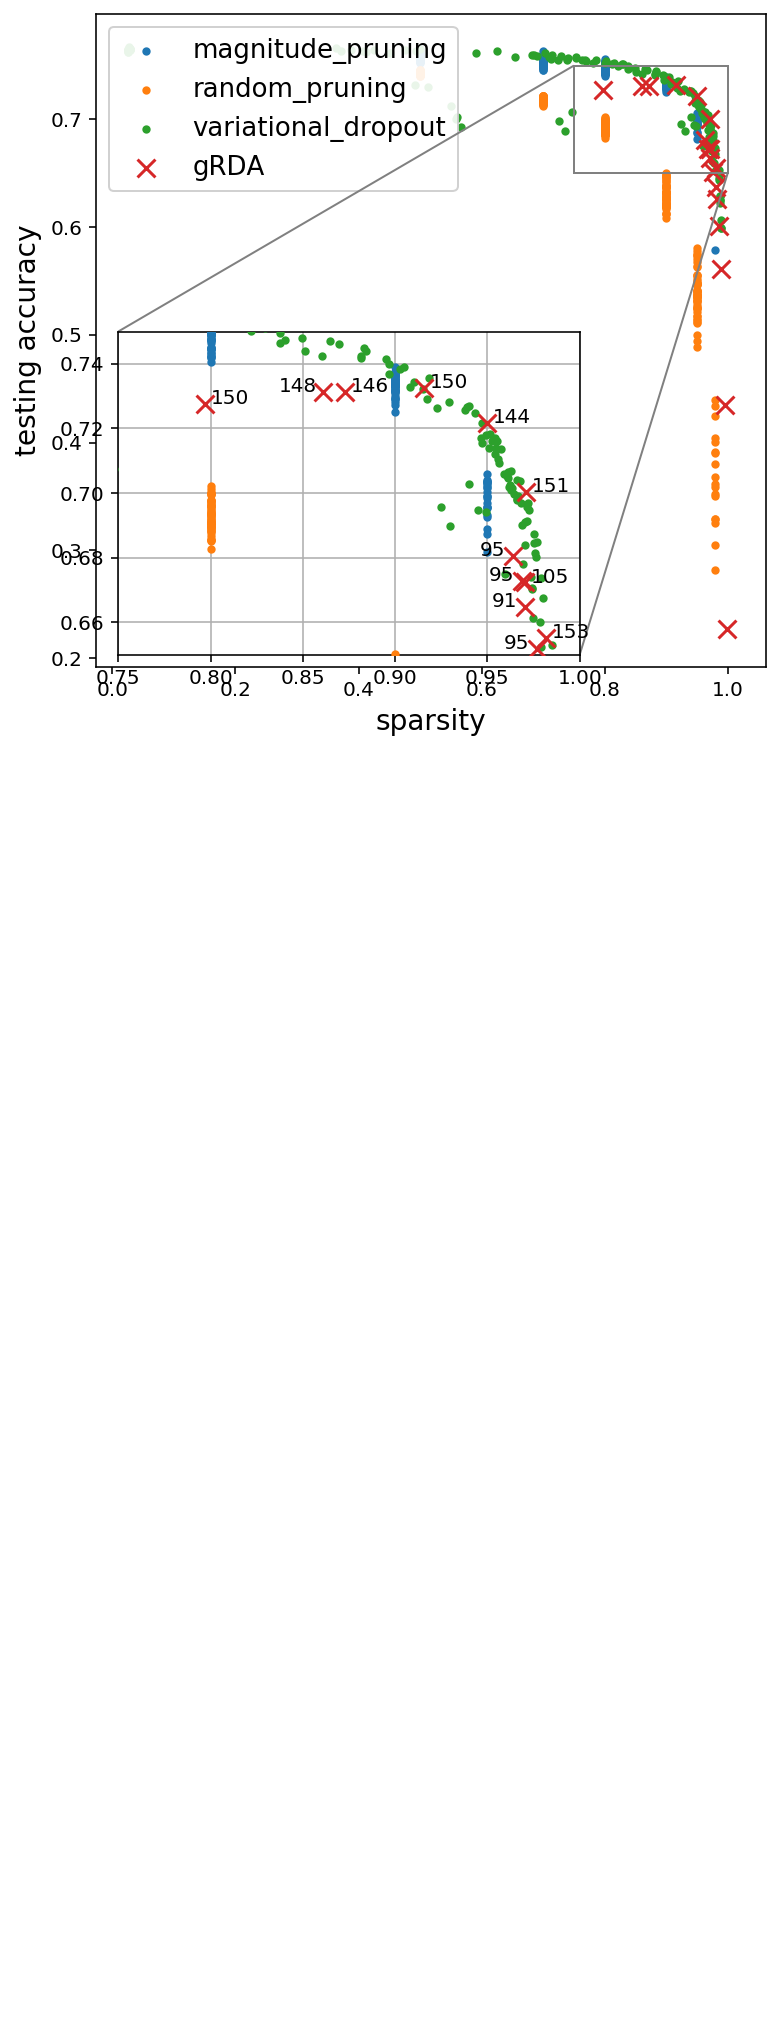

In [4]:
names = ["gRDA", "magnitude_pruning", "random_pruning", "variational_dropout"]
fig, axs = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(6)

for i in range(len(names)-1):
    axs.scatter(total_df[i+1]['global sparsity'], total_df[i+1]['Accuracy'], label=names[i+1], s=10)
axs.scatter(total_df[0]['global sparsity'], total_df[0]['Accuracy'], label=names[0], s=80, marker='x')


axins = zoomed_inset_axes(axs, 3, loc="lower left", bbox_to_anchor=(70,60), borderpad=3)
mark_inset(axs, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([0.75,1])
axins.set_ylim([0.65,0.75])
axs_sub = axins
axs_sub.grid(zorder=0)
for i in range(len(names)-1):
    axs_sub.scatter(total_df[i+1]['global sparsity'], total_df[i+1]['Accuracy'], label=names[i+1], s=10, zorder=3)
axs_sub.scatter(total_df[0]['global sparsity'], total_df[0]['Accuracy'], label=names[0], s=80, marker='x', zorder=3)

gRDA_labels = list(gRDA_df['epoch'])
for i, gRDA_label in enumerate(gRDA_labels):
    if gRDA_label == 148:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]-0.024, total_df[0]['Accuracy'][i]), fontsize=10)
    elif gRDA_label > 120:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]+0.003, total_df[0]['Accuracy'][i]), fontsize=10)
    elif gRDA_label == 105:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]+0.003, total_df[0]['Accuracy'][i]), fontsize=10)
    else:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]-0.018, total_df[0]['Accuracy'][i]), fontsize=10)
#     plt.text(total_df[0]['global sparsity'][i]+.001, total_df[0]['Accuracy'][i]+.001, gRDA_label, fontsize=9)

axs.legend(loc='upper left', framealpha=0.9, fontsize=13)
axs.set_xlabel('sparsity', fontsize=14)
axs.set_ylabel('testing accuracy', fontsize=14)


plt.savefig("compare_gale_gRDA_light_with_arrow-largefont_all.pdf")